In [1]:
from cpymad.madx import Madx
import numpy as np
import requests
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')
%config InlineBackend.figure_format = 'retina' # retina display

import matplotlib.patches as patches

def plotLatticeSeries(ax,series, height=1., v_offset=0., color='r',alpha=0.5):
    aux=series
    ax.add_patch(
    patches.Rectangle(
        (aux.s-aux.l, v_offset-height/2.),   # (x,y)
        aux.l,          # width
        height,          # height
        color=color, alpha=alpha
    )
    )
    return;

##  LHC and orbit control 
In this example wi will study how to build the crossing angle bump in Beam1. We will consider the collision optics and we will start from a flat orbit.

In [2]:
# import elements, sequence and strengths
madx = Madx(stdout=False)
response = requests.get('http://lhc-optics.web.cern.ch/lhc-optics/runII/2018/lhc_as-built.seq')
data = response.text
madx.input(data);

    
response = requests.get('http://lhc-optics.web.cern.ch/lhc-optics/runII/2018/PROTON/opticsfile.22_ctpps2')
data = response.text
madx.input(data);

In [3]:
madx.input(
'''
beam, sequence=lhcb1, bv= 1,
  particle=proton, charge=1, mass=0.938272046,
  energy= 450,   npart=1.2e11,kbunch=2076,
  ex=5.2126224777777785e-09,ey=5.2126224777777785e-09;
beam, sequence=lhcb2, bv=-1,
  particle=proton, charge=1, mass=0.938272046,
  energy= 450,   npart=1.2e11,kbunch=2076,
  ex=5.2126224777777785e-09,ey=5.2126224777777785e-09;
''');

In [4]:
madx.input(
'''
seqedit, sequence=lhcb1;
flatten;
cycle, start=ip1;
flatten;
endedit;

use, sequence=lhcb1;
twiss;
''');

In [5]:
myTwissB1=madx.table.twiss.dframe()

In [6]:
madx.input(
'''
seqedit, sequence=lhcb2;
flatten;
cycle, start=ip1;
flatten;
endedit;

use, sequence=lhcb2;
twiss;
''');

In [7]:
myTwissB2=madx.table.twiss.dframe()

### Beam 1

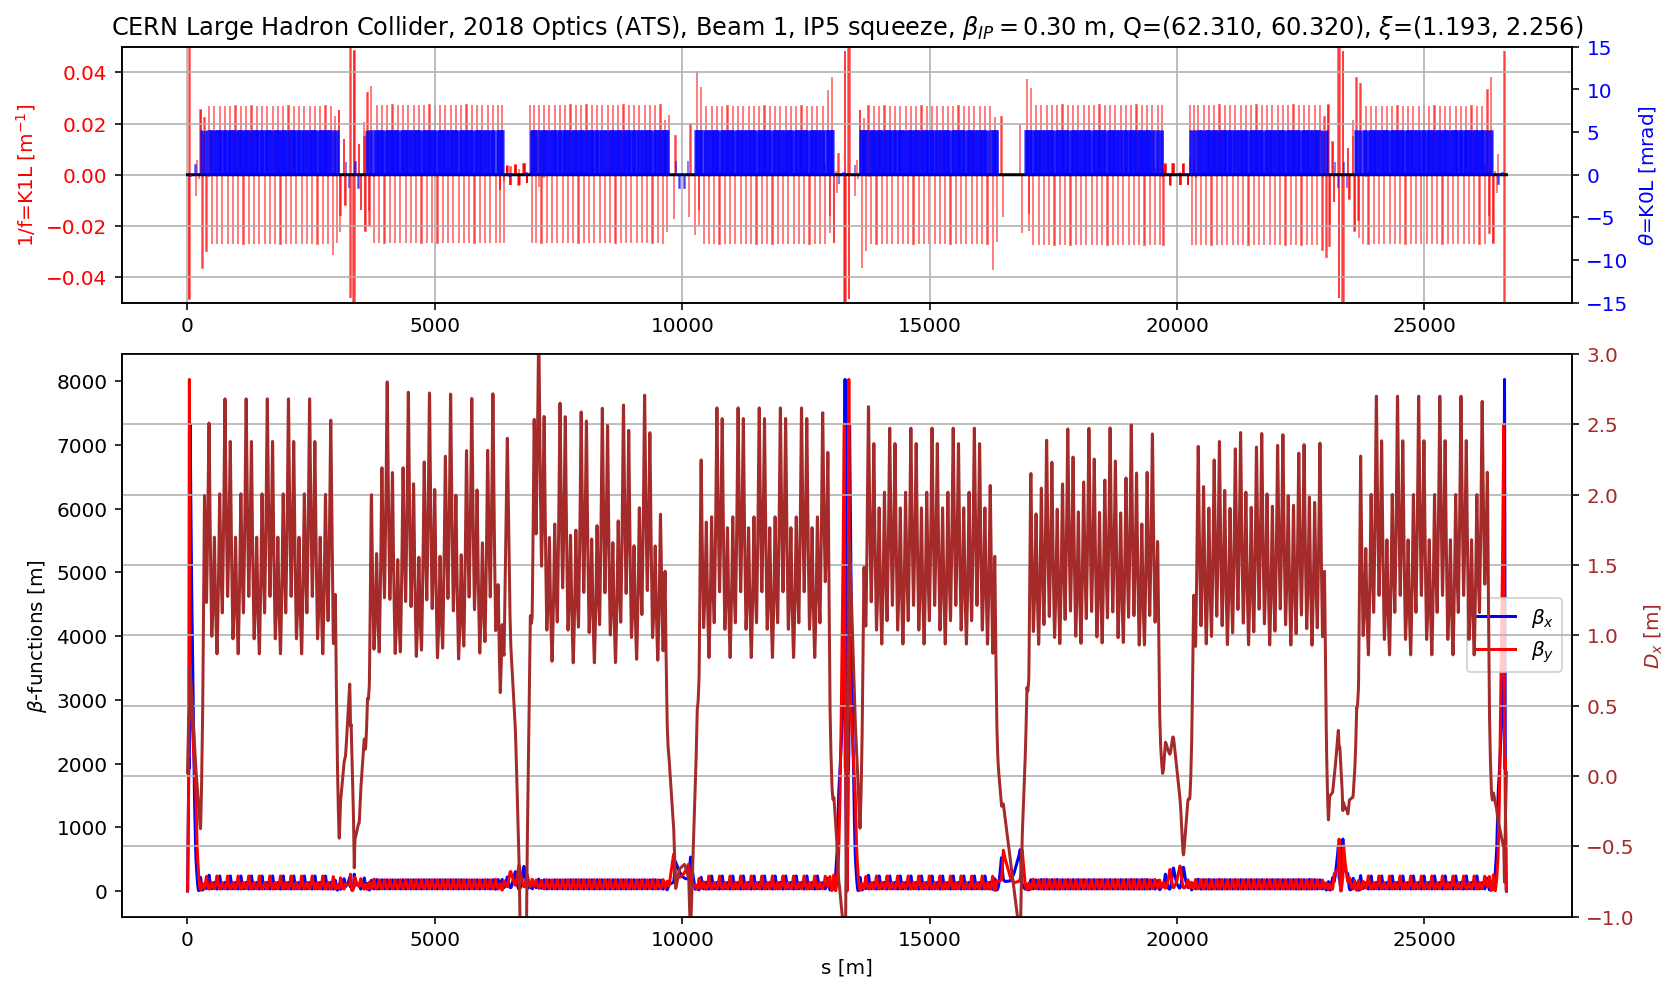

In [8]:
# plotting the results
myTwiss=myTwissB1
fig = plt.figure(figsize=(13,8))
# set up subplot grid
#gridspec.GridSpec(3,3)

ax1=plt.subplot2grid((3,3), (0,0), colspan=3, rowspan=1)
plt.plot(myTwiss['s'],0*myTwiss['s'],'k')



    
DF=myTwiss[(myTwiss['keyword']=='quadrupole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k1l, v_offset=aux.k1l/2, color='r')

    
color = 'red'
ax1.set_ylabel('1/f=K1L [m$^{-1}$]', color=color)  # we already handled the x-label with ax1
ax1.tick_params(axis='y', labelcolor=color)
plt.grid()
plt.ylim(-.05,.05)
plt.title('CERN Large Hadron Collider, 2018 Optics (ATS), Beam 1, IP5 squeeze, $\\beta_{IP}=$'+format(myTwiss[myTwiss['name'].str.contains('ip5')]['betx'].values[0],'2.2f')+' m, Q=('+format(madx.table.summ.Q1[0],'2.3f')+', '+ format(madx.table.summ.Q2[0],'2.3f')+'), $\\xi$=('+format(madx.table.summ.DQ1[0],'2.3f')+', '+ format(madx.table.summ.DQ2[0],'2.3f')+')')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('$\\theta$=K0L [mrad]', color=color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)


DF=myTwiss[(myTwiss['keyword']=='rbend')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(ax2,aux, height=aux.angle*1000, v_offset=aux.angle/2*1000, color='b')

DF=myTwiss[(myTwiss['keyword']=='sbend')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(ax2,aux, height=aux.angle*1000, v_offset=aux.angle/2*1000, color='b')

    
plt.ylim(-15,15)

# large subplot
plt.subplot2grid((3,3), (1,0), colspan=3, rowspan=2,sharex=ax1)

plt.plot(myTwiss['s'],myTwiss['betx'],'b', label='$\\beta_x$')
plt.plot(myTwiss['s'],myTwiss['bety'],'r', label='$\\beta_y$')
plt.legend(loc='best')
plt.ylabel('$\\beta$-functions [m]')
plt.xlabel('s [m]')

ax3 = plt.gca().twinx()   # instantiate a second axes that shares the same x-axis
plt.plot(myTwiss['s'],myTwiss['dx'],'brown', label='$D_x$')
ax3.set_ylabel('$D_x$ [m]', color='brown')  # we already handled the x-label with ax1
ax3.tick_params(axis='y', labelcolor='brown')
plt.ylim(-1, 3)

plt.grid()

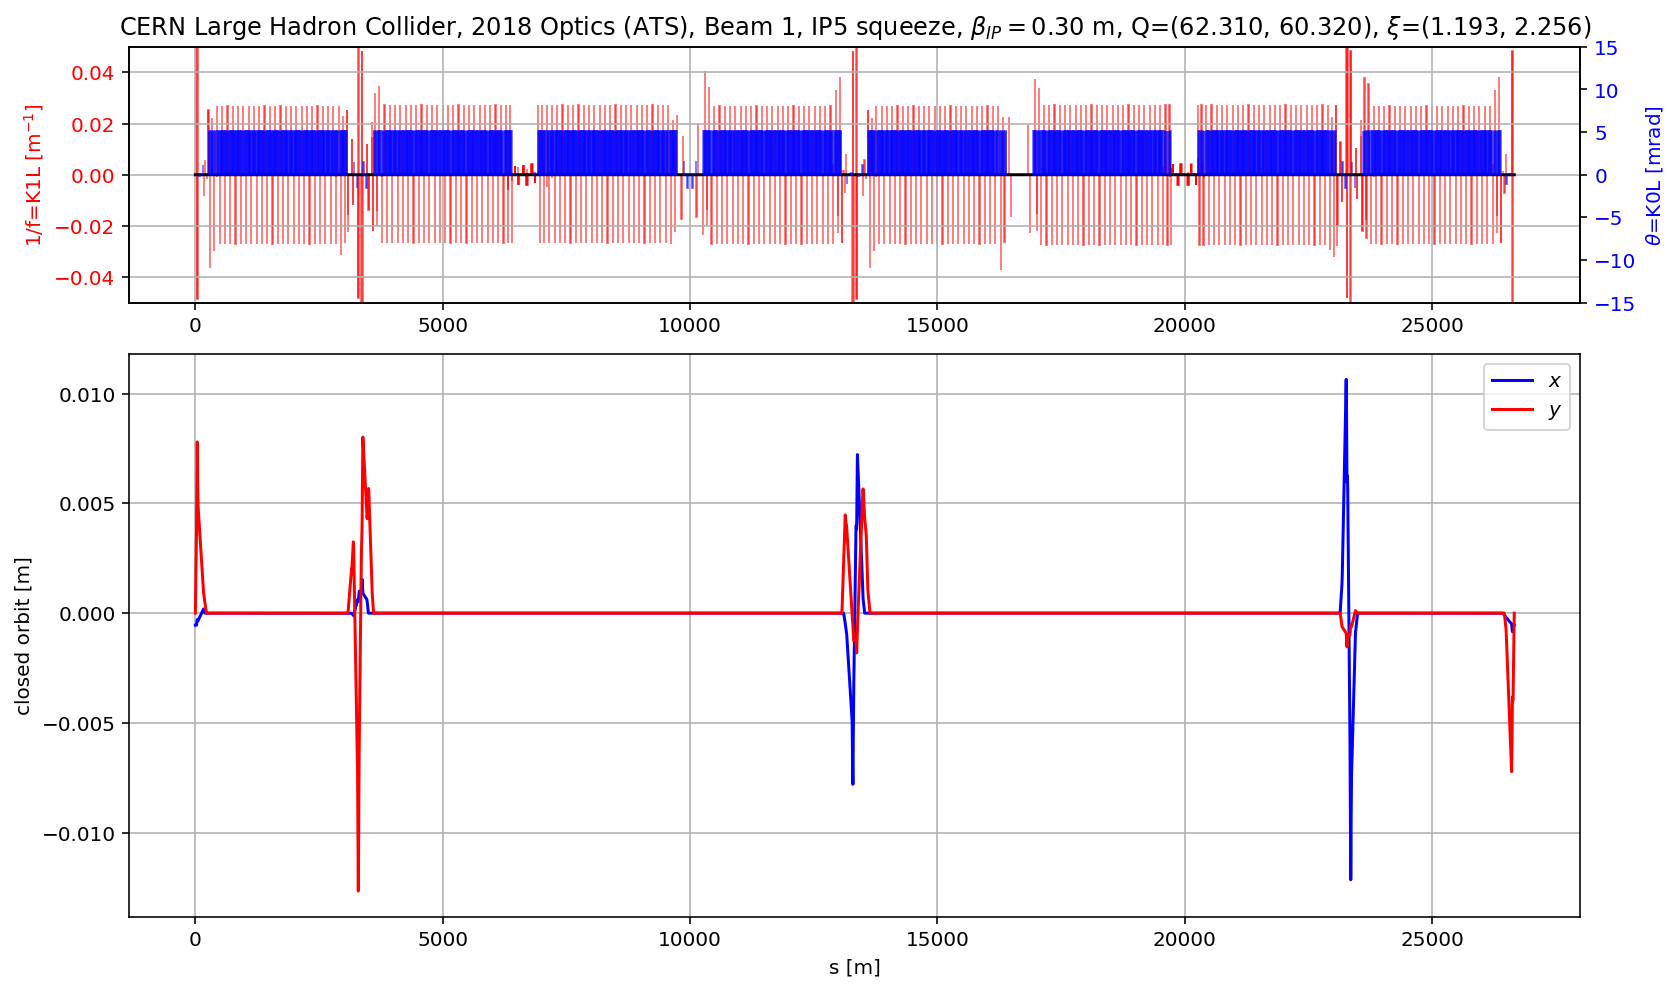

In [9]:
# plotting the results
fig = plt.figure(figsize=(13,8))
# set up subplot grid
#gridspec.GridSpec(3,3)

ax1=plt.subplot2grid((3,3), (0,0), colspan=3, rowspan=1)
plt.plot(myTwiss['s'],0*myTwiss['s'],'k')



    
DF=myTwiss[(myTwiss['keyword']=='quadrupole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k1l, v_offset=aux.k1l/2, color='r')

    
color = 'red'
ax1.set_ylabel('1/f=K1L [m$^{-1}$]', color=color)  # we already handled the x-label with ax1
ax1.tick_params(axis='y', labelcolor=color)
plt.grid()
plt.ylim(-.05,.05)
plt.title('CERN Large Hadron Collider, 2018 Optics (ATS), Beam 1, IP5 squeeze, $\\beta_{IP}=$'+format(myTwiss[myTwiss['name'].str.contains('ip5')]['betx'].values[0],'2.2f')+' m, Q=('+format(madx.table.summ.Q1[0],'2.3f')+', '+ format(madx.table.summ.Q2[0],'2.3f')+'), $\\xi$=('+format(madx.table.summ.DQ1[0],'2.3f')+', '+ format(madx.table.summ.DQ2[0],'2.3f')+')')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('$\\theta$=K0L [mrad]', color=color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)


DF=myTwiss[(myTwiss['keyword']=='rbend')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(ax2,aux, height=aux.angle*1000, v_offset=aux.angle/2*1000, color='b')

DF=myTwiss[(myTwiss['keyword']=='sbend')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(ax2,aux, height=aux.angle*1000, v_offset=aux.angle/2*1000, color='b')

    
plt.ylim(-15,15)

# large subplot
plt.subplot2grid((3,3), (1,0), colspan=3, rowspan=2,sharex=ax1)

plt.plot(myTwiss['s'],myTwiss['x'],'b', label='$x$')
plt.plot(myTwiss['s'],myTwiss['y'],'r', label='$y$')
plt.legend(loc='best')
plt.ylabel('closed orbit [m]')
plt.xlabel('s [m]')

#ax3 = plt.gca().twinx()   # instantiate a second axes that shares the same x-axis
#plt.plot(myTwiss['s'],myTwiss['dx'],'lightgray', label='$D_x$')
#ax3.set_ylabel('$D_x$ [m]', color='lightgray')  # we already handled the x-label with ax1
#ax3.tick_params(axis='y', labelcolor='lightgray')
#plt.ylim(-1, 3)

plt.grid()

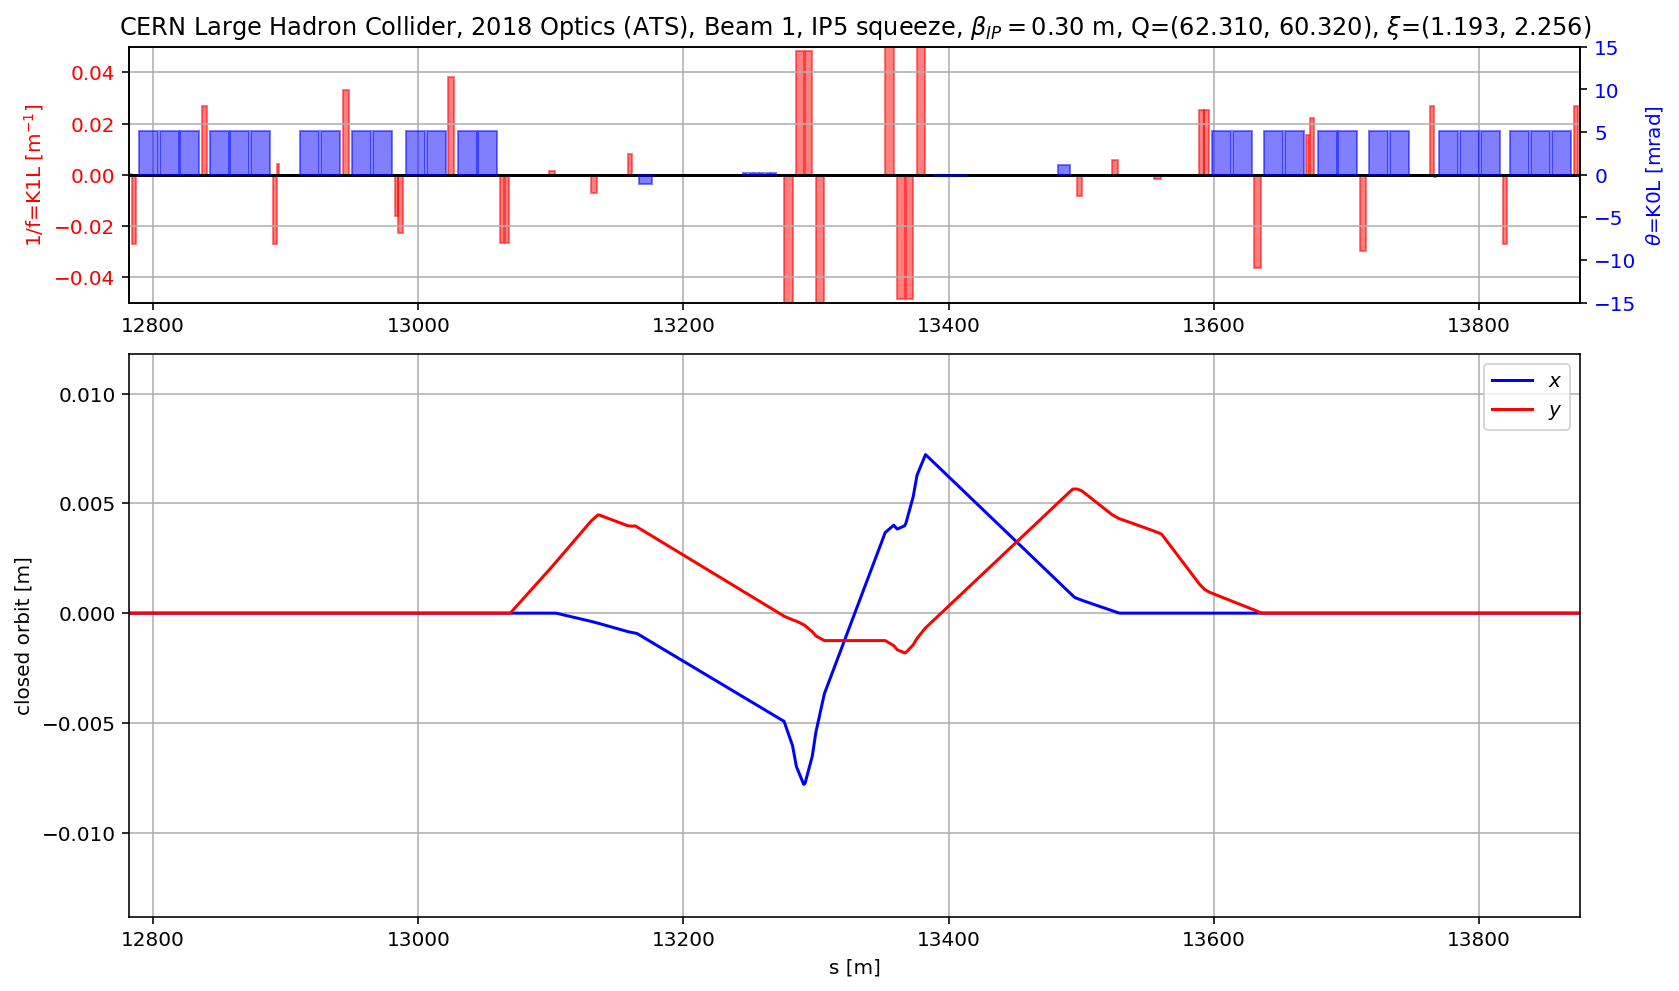

In [10]:
aux=myTwiss[myTwiss['keyword']=='marker']
fig.gca().set_xlim(aux[(aux['name']).str.contains('s.ds.l5.b1:1')].s.values[0],aux[(aux['name']).str.contains('e.ds.r5.b1:1')].s.values[0])
display(fig)

###  Beam 2

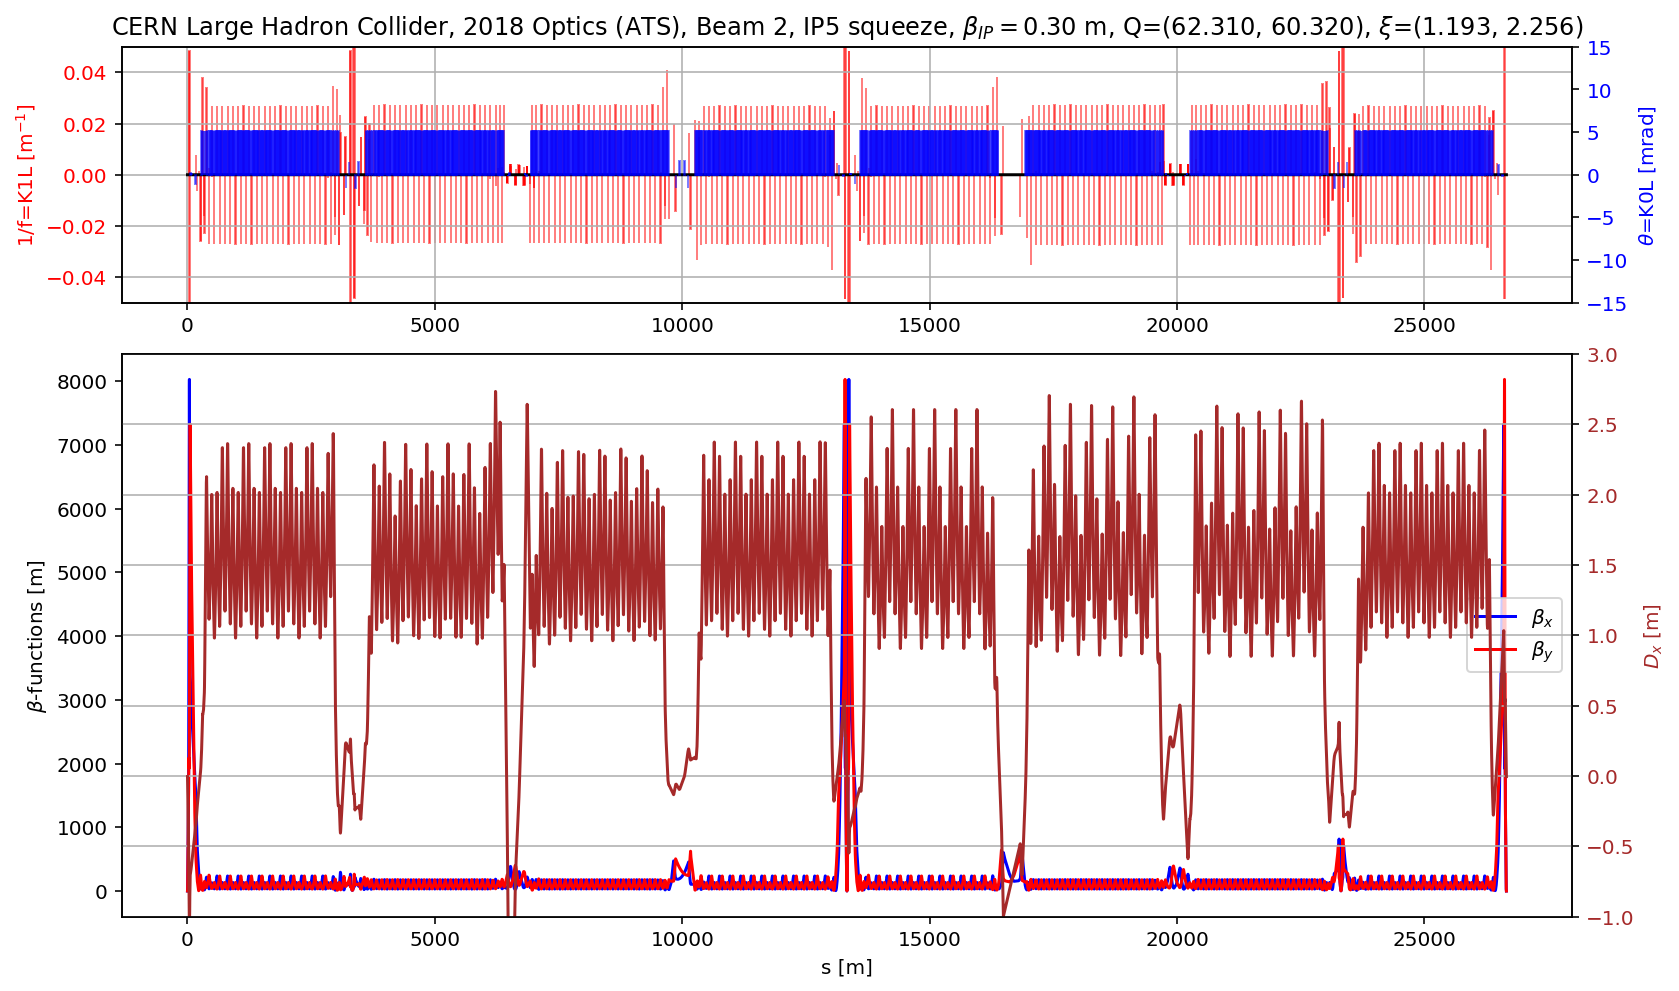

In [11]:
# plotting the results
myTwiss=myTwissB2
fig = plt.figure(figsize=(13,8))
# set up subplot grid
#gridspec.GridSpec(3,3)

ax1=plt.subplot2grid((3,3), (0,0), colspan=3, rowspan=1)
plt.plot(myTwiss['s'],0*myTwiss['s'],'k')



    
DF=myTwiss[(myTwiss['keyword']=='quadrupole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k1l, v_offset=aux.k1l/2, color='r')

    
color = 'red'
ax1.set_ylabel('1/f=K1L [m$^{-1}$]', color=color)  # we already handled the x-label with ax1
ax1.tick_params(axis='y', labelcolor=color)
plt.grid()
plt.ylim(-.05,.05)
plt.title('CERN Large Hadron Collider, 2018 Optics (ATS), Beam 2, IP5 squeeze, $\\beta_{IP}=$'+format(myTwiss[myTwiss['name'].str.contains('ip5')]['betx'].values[0],'2.2f')+' m, Q=('+format(madx.table.summ.Q1[0],'2.3f')+', '+ format(madx.table.summ.Q2[0],'2.3f')+'), $\\xi$=('+format(madx.table.summ.DQ1[0],'2.3f')+', '+ format(madx.table.summ.DQ2[0],'2.3f')+')')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('$\\theta$=K0L [mrad]', color=color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)


DF=myTwiss[(myTwiss['keyword']=='rbend')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(ax2,aux, height=aux.angle*1000, v_offset=aux.angle/2*1000, color='b')

DF=myTwiss[(myTwiss['keyword']=='sbend')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(ax2,aux, height=aux.angle*1000, v_offset=aux.angle/2*1000, color='b')

    
plt.ylim(-15,15)

# large subplot
plt.subplot2grid((3,3), (1,0), colspan=3, rowspan=2,sharex=ax1)

plt.plot(myTwiss['s'],myTwiss['betx'],'b', label='$\\beta_x$')
plt.plot(myTwiss['s'],myTwiss['bety'],'r', label='$\\beta_y$')
plt.legend(loc='best')
plt.ylabel('$\\beta$-functions [m]')
plt.xlabel('s [m]')

ax3 = plt.gca().twinx()   # instantiate a second axes that shares the same x-axis
plt.plot(myTwiss['s'],myTwiss['dx'],'brown', label='$D_x$')
ax3.set_ylabel('$D_x$ [m]', color='brown')  # we already handled the x-label with ax1
ax3.tick_params(axis='y', labelcolor='brown')
plt.ylim(-1, 3)

plt.grid()

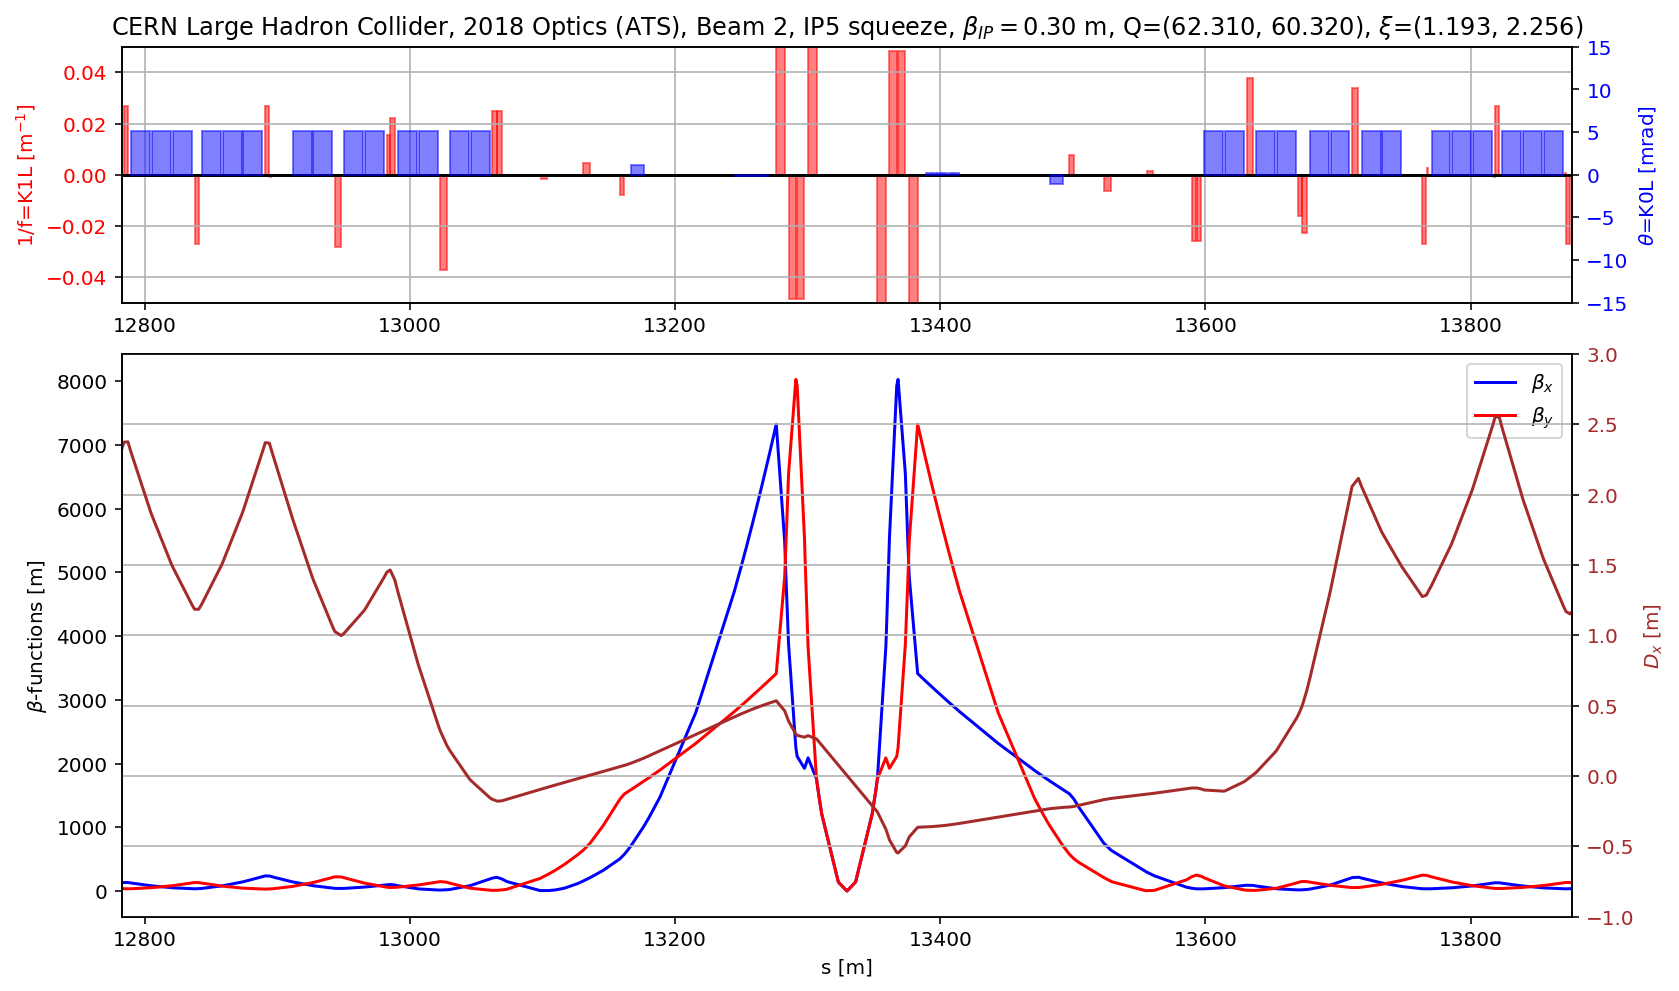

In [12]:
aux=myTwiss[myTwiss['keyword']=='marker']
fig.gca().set_xlim(aux[(aux['name']).str.contains('s.ds.l5.b2:1')].s.values[0],aux[(aux['name']).str.contains('e.ds.r5.b2:1')].s.values[0])
display(fig)

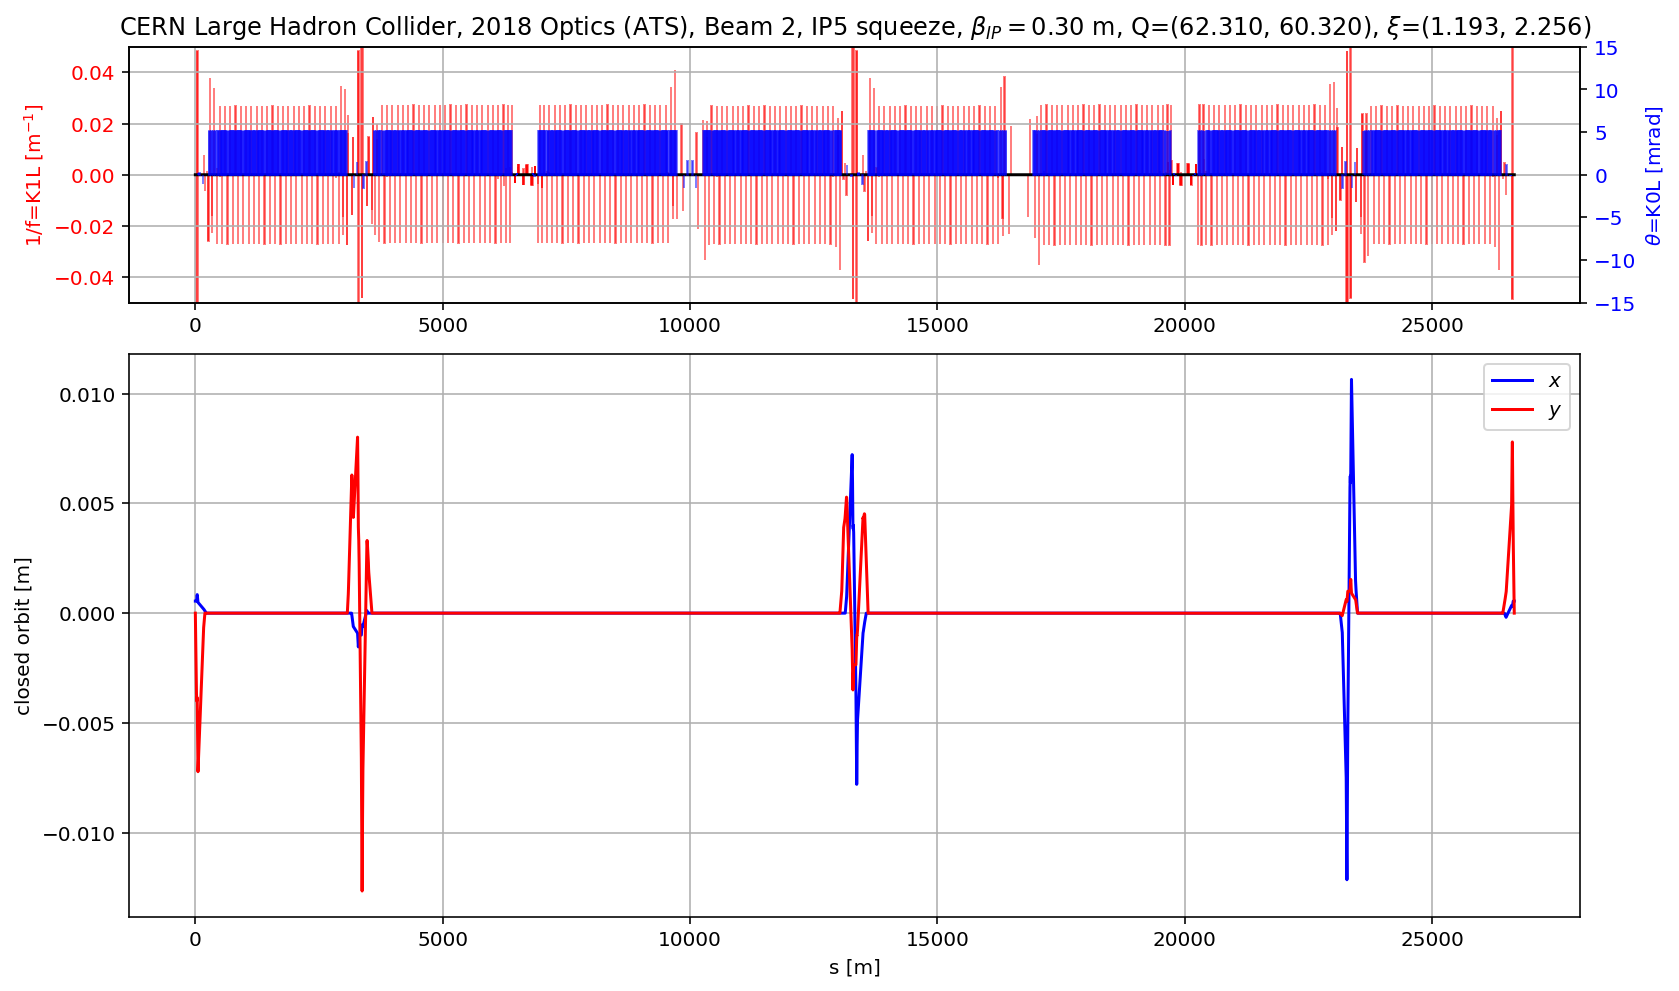

In [13]:
# plotting the results
fig = plt.figure(figsize=(13,8))
# set up subplot grid
#gridspec.GridSpec(3,3)

ax1=plt.subplot2grid((3,3), (0,0), colspan=3, rowspan=1)
plt.plot(myTwiss['s'],0*myTwiss['s'],'k')



    
DF=myTwiss[(myTwiss['keyword']=='quadrupole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k1l, v_offset=aux.k1l/2, color='r')

    
color = 'red'
ax1.set_ylabel('1/f=K1L [m$^{-1}$]', color=color)  # we already handled the x-label with ax1
ax1.tick_params(axis='y', labelcolor=color)
plt.grid()
plt.ylim(-.05,.05)
plt.title('CERN Large Hadron Collider, 2018 Optics (ATS), Beam 2, IP5 squeeze, $\\beta_{IP}=$'+format(myTwiss[myTwiss['name'].str.contains('ip5')]['betx'].values[0],'2.2f')+' m, Q=('+format(madx.table.summ.Q1[0],'2.3f')+', '+ format(madx.table.summ.Q2[0],'2.3f')+'), $\\xi$=('+format(madx.table.summ.DQ1[0],'2.3f')+', '+ format(madx.table.summ.DQ2[0],'2.3f')+')')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('$\\theta$=K0L [mrad]', color=color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)


DF=myTwiss[(myTwiss['keyword']=='rbend')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(ax2,aux, height=aux.angle*1000, v_offset=aux.angle/2*1000, color='b')

DF=myTwiss[(myTwiss['keyword']=='sbend')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(ax2,aux, height=aux.angle*1000, v_offset=aux.angle/2*1000, color='b')

    
plt.ylim(-15,15)

# large subplot
plt.subplot2grid((3,3), (1,0), colspan=3, rowspan=2,sharex=ax1)

plt.plot(myTwiss['s'],myTwiss['x'],'b', label='$x$')
plt.plot(myTwiss['s'],myTwiss['y'],'r', label='$y$')
plt.legend(loc='best')
plt.ylabel('closed orbit [m]')
plt.xlabel('s [m]')

#ax3 = plt.gca().twinx()   # instantiate a second axes that shares the same x-axis
#plt.plot(myTwiss['s'],myTwiss['dx'],'lightgray', label='$D_x$')
#ax3.set_ylabel('$D_x$ [m]', color='lightgray')  # we already handled the x-label with ax1
#ax3.tick_params(axis='y', labelcolor='lightgray')
#plt.ylim(-1, 3)

plt.grid()

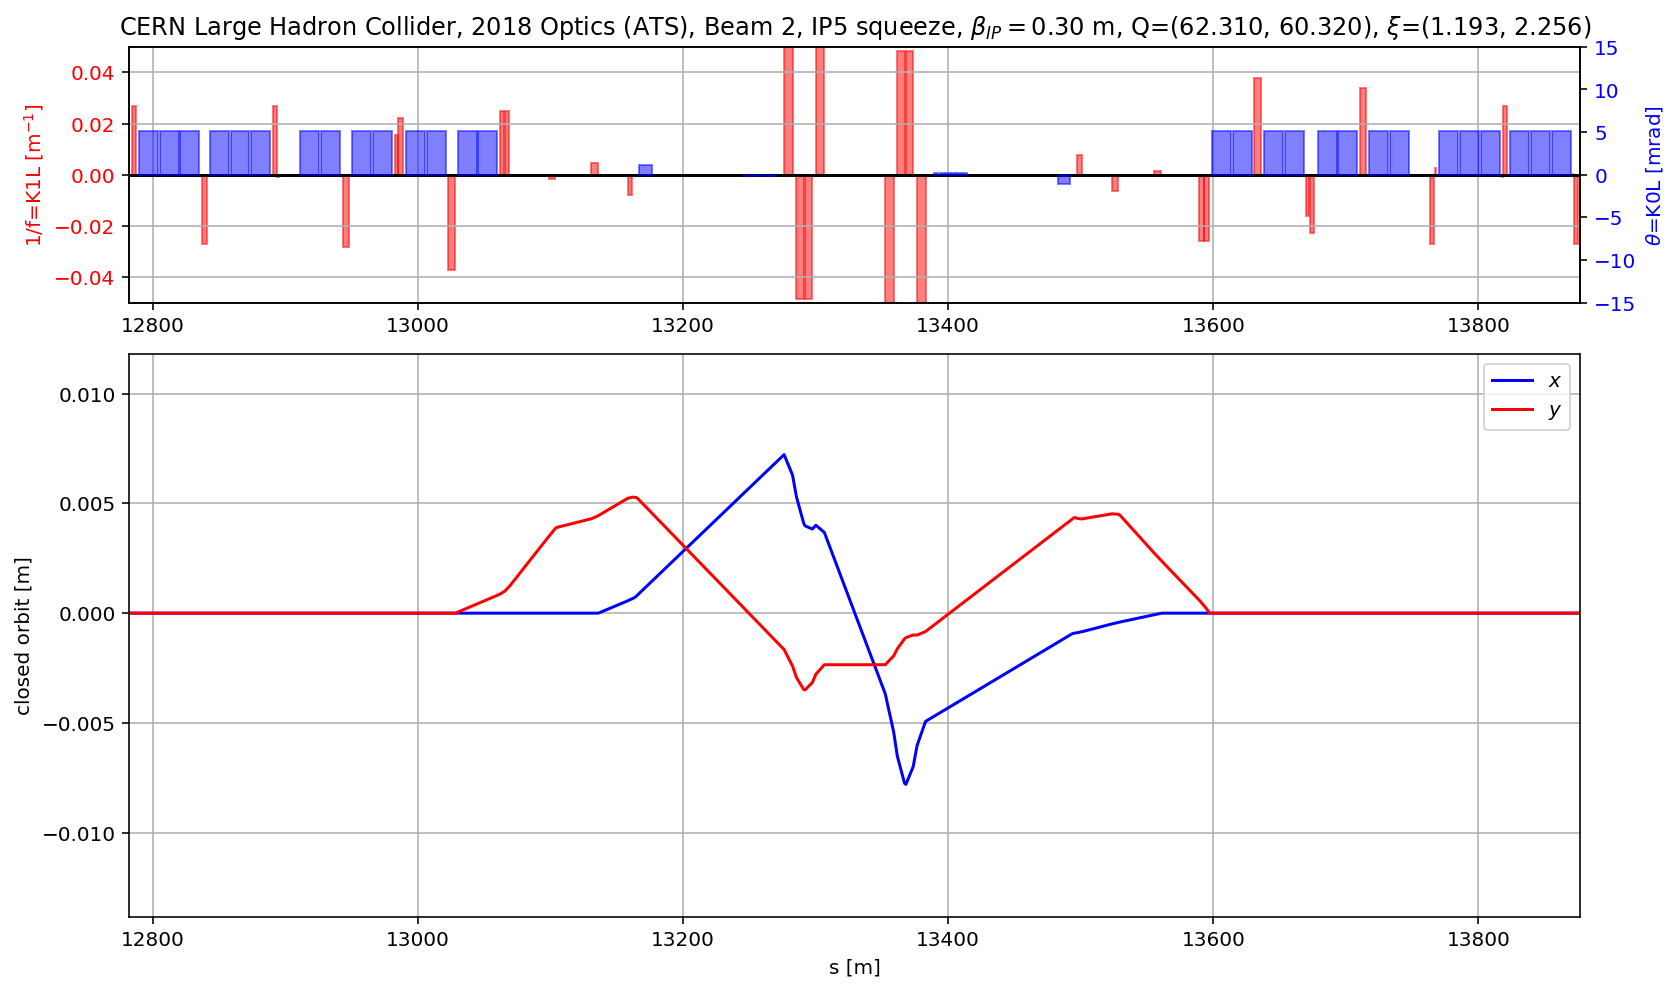

In [14]:
aux=myTwiss[myTwiss['keyword']=='marker']
fig.gca().set_xlim(aux[(aux['name']).str.contains('s.ds.l5.b2:1')].s.values[0],aux[(aux['name']).str.contains('e.ds.r5.b2:1')].s.values[0])
display(fig)

Now we will flatten the orbit and compute the response matrix of the used correctors. For simplicity we will use consider only Beam 1 in the H-plane (this is not fully correct since there is a corrector shared between the two beams).

In [15]:
madx.input('''
!***Exp. configuration in IR1, IR2, IR5 and IR8***
  on_x1  :=    0.000;
  on_x2  :=    0.000;
  on_x5  :=    0.000;
  on_x8  :=    0.000;

  on_sep1:=    0;
  on_sep2:=    0;
  on_sep5:=    0;
  on_sep7:=    0;
  on_ov5 :=    0;

  on_xx1 :=    0;
  on_xx1 :=    0;
  
  on_x2  :=    0.000  ;
  on_sep2:=    0.000  ;
  on_a2  :=    0.000  ;
  on_o2  :=    0.000  ;
  on_oh2 :=    0.000  ;
  on_ov2 :=    0.000  ;
  phi_IR2:=   90.000  ;
  on_x8  :=   0 .000  ;
  on_sep8:=    0.000  ;
  on_a8  :=    0.000  ;
  on_o8  :=    0.000  ;
  on_oh8 :=    0.000  ;
  on_ov8 :=    0.000  ;
  phi_IR8:=  180.000  ;
  
use, sequence=lhcb1;
twiss;
''')

True

In [16]:
myTwissB1=madx.table.twiss.dframe()

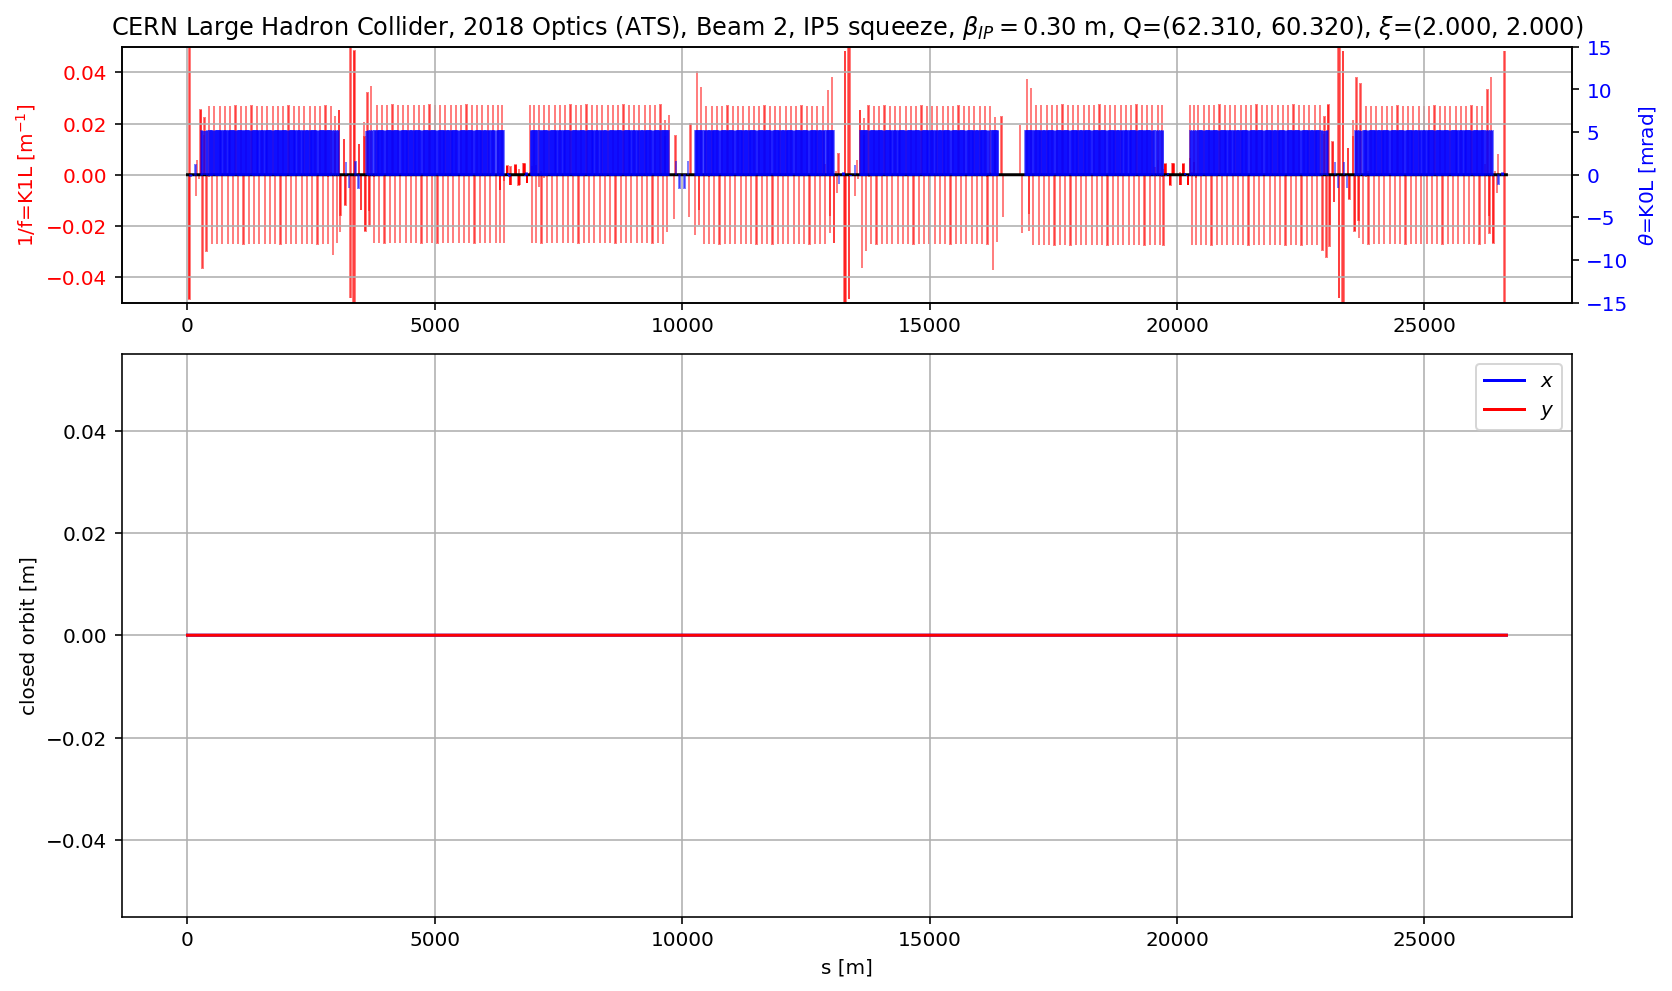

In [17]:
# plotting the results
myTwiss=myTwissB1
fig = plt.figure(figsize=(13,8))
# set up subplot grid
#gridspec.GridSpec(3,3)

ax1=plt.subplot2grid((3,3), (0,0), colspan=3, rowspan=1)
plt.plot(myTwiss['s'],0*myTwiss['s'],'k')

DF=myTwiss[(myTwiss['keyword']=='quadrupole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k1l, v_offset=aux.k1l/2, color='r')

    
color = 'red'
ax1.set_ylabel('1/f=K1L [m$^{-1}$]', color=color)  # we already handled the x-label with ax1
ax1.tick_params(axis='y', labelcolor=color)
plt.grid()
plt.ylim(-.05,.05)
plt.title('CERN Large Hadron Collider, 2018 Optics (ATS), Beam 2, IP5 squeeze, $\\beta_{IP}=$'+format(myTwiss[myTwiss['name'].str.contains('ip5')]['betx'].values[0],'2.2f')+' m, Q=('+format(madx.table.summ.Q1[0],'2.3f')+', '+ format(madx.table.summ.Q2[0],'2.3f')+'), $\\xi$=('+format(madx.table.summ.DQ1[0],'2.3f')+', '+ format(madx.table.summ.DQ2[0],'2.3f')+')')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('$\\theta$=K0L [mrad]', color=color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)


DF=myTwiss[(myTwiss['keyword']=='rbend')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(ax2,aux, height=aux.angle*1000, v_offset=aux.angle/2*1000, color='b')

DF=myTwiss[(myTwiss['keyword']=='sbend')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(ax2,aux, height=aux.angle*1000, v_offset=aux.angle/2*1000, color='b')

    
plt.ylim(-15,15)

# large subplot
plt.subplot2grid((3,3), (1,0), colspan=3, rowspan=2,sharex=ax1)

plt.plot(myTwiss['s'],myTwiss['x'],'b', label='$x$')
plt.plot(myTwiss['s'],myTwiss['y'],'r', label='$y$')
plt.legend(loc='best')
plt.ylabel('closed orbit [m]')
plt.xlabel('s [m]')

#ax3 = plt.gca().twinx()   # instantiate a second axes that shares the same x-axis
#plt.plot(myTwiss['s'],myTwiss['dx'],'lightgray', label='$D_x$')
#ax3.set_ylabel('$D_x$ [m]', color='lightgray')  # we already handled the x-label with ax1
#ax3.tick_params(axis='y', labelcolor='lightgray')
#plt.ylim(-1, 3)

plt.grid()

In [18]:
myTwissB1[(myTwissB1['name'].str.contains('mcbxh.1l5')) |\
          (myTwissB1['name'].str.contains('mcbxh.1r5')) |\
          (myTwissB1['name'].str.contains('mcbxh.2l5')) |\
          (myTwissB1['name'].str.contains('mcbxh.2r5')) |\
          (myTwissB1['name'].str.contains('mcbxh.3l5')) |\
          (myTwissB1['name'].str.contains('mcbxh.3r5')) |\
          (myTwissB1['name'].str.contains('mcbyh.a4l5.b1')) |\
          (myTwissB1['name'].str.contains('mcbyh.4r5.b1')) |\
          (myTwissB1['name'].str.contains('mcbch.6l5.b1')) |\
          (myTwissB1['name'].str.contains('mcbch.5r5.b1'))]


,name,keyword,s,betx,alfx,mux,bety,alfy,muy,x,...,sig54,sig55,sig56,sig61,sig62,sig63,sig64,sig65,sig66,n1
mcbch.6l5.b1,mcbch.6l5.b1:1,hkicker,13104.391233,297.481455,-5.102611,30.684836,5.990518,-0.434387,29.217155,0.0,...,0.0,1.423701e-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mcbyh.a4l5.b1,mcbyh.a4l5.b1:1,hkicker,13165.299733,1575.599241,-6.688539,30.699920,679.761810,-13.994819,29.390886,0.0,...,0.0,1.423701e-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mcbxh.3l5,mcbxh.3l5:1,hkicker,13275.475233,3401.786340,-9.886717,30.707497,7278.727869,-45.899981,29.398772,0.0,...,0.0,-1.195324e-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mcbxh.2l5,mcbxh.2l5:1,hkicker,13291.270233,7971.882674,50.815228,30.707989,2175.091250,67.774111,29.399383,0.0,...,0.0,-1.195324e-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mcbxh.1l5,mcbxh.1l5:1,hkicker,13299.447233,4124.299048,296.712351,30.708198,2057.548573,-30.685857,29.400048,0.0,...,0.0,-1.195324e-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mcbxh.1r5,mcbxh.1r5:1,hkicker,13359.131233,2057.548572,30.685857,31.205012,4124.299050,-296.712351,29.896862,0.0,...,0.0,-1.195324e-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mcbxh.2r5,mcbxh.2r5:1,hkicker,13367.308233,2175.091249,-67.774111,31.205677,7971.882678,-50.815228,29.897071,0.0,...,0.0,-1.195324e-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mcbxh.3r5,mcbxh.3r5:1,hkicker,13383.103233,7278.727866,45.899981,31.206287,3401.786342,9.886717,29.897563,0.0,...,0.0,-1.195324e-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mcbyh.4r5.b1,mcbyh.4r5.b1:1,hkicker,13495.473733,619.743798,13.359204,31.214712,1546.347170,6.625111,29.905364,0.0,...,0.0,1.420289e-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mcbch.5r5.b1,mcbch.5r5.b1:1,hkicker,13529.271233,152.359301,5.192061,31.232362,602.456224,8.140284,29.910900,0.0,...,0.0,1.420289e-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
kickerList=['ACBXH1.L5',
'ACBXH1.R5',
'ACBXH2.L5',
'ACBXH2.R5',
'ACBXH3.L5',
'ACBXH3.R5',
'ACBYHS4.L5B1',
'ACBYHS4.R5B1',
'ACBCH6.L5B1',
'ACBCH5.R5B1']

In [20]:
DFList=[]
for i in kickerList:
    print(i)
    madx.input( i +'''=1e-6;
    use, sequence=lhcb1;
    twiss;
    '''+ i +'''=0;''' )
    DFList.append(madx.table.twiss.dframe())

# reference
madx.input('''twiss;''')
DFList.append(madx.table.twiss.dframe())


ACBXH1.L5
ACBXH1.R5
ACBXH2.L5
ACBXH2.R5
ACBXH3.L5
ACBXH3.R5
ACBYHS4.L5B1
ACBYHS4.R5B1
ACBCH6.L5B1
ACBCH5.R5B1


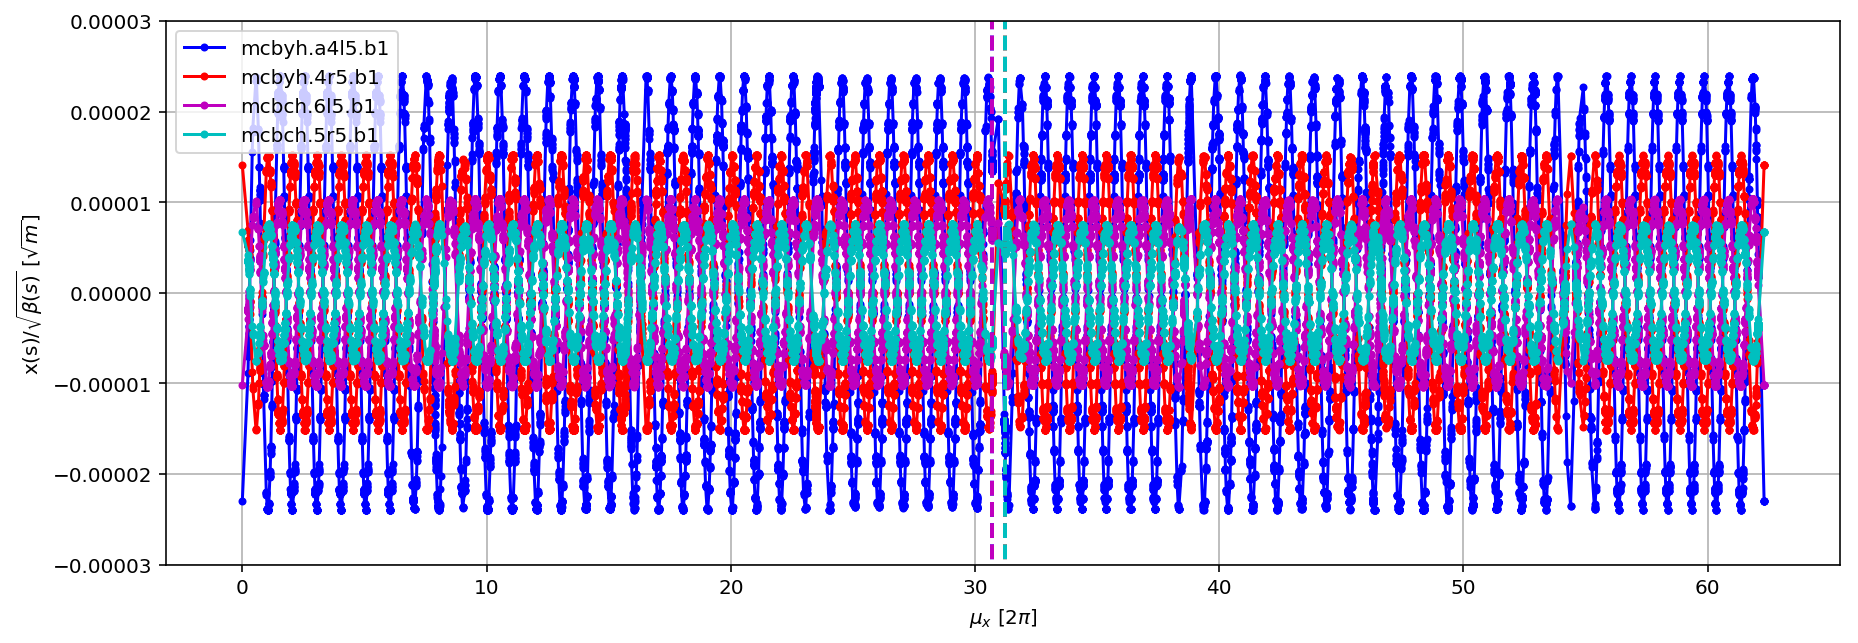

In [24]:
myFig=plt.figure(figsize=(15,5))
aux=madx.table.twiss.dframe()
colorList=['b','r','m','c']
for i,j,k in zip(range(6,10), range(5), ['mcbyh.a4l5.b1','mcbyh.4r5.b1','mcbch.6l5.b1','mcbch.5r5.b1']):
    plt.plot(DFList[i].mux.values,(DFList[i].x.values)/np.sqrt(DFList[i].betx.values),'.-',color=colorList[j], label=k)
plt.grid()
for i,j in zip(['mcbyh.a4l5.b1','mcbyh.4r5.b1','mcbch.6l5.b1','mcbch.5r5.b1'],range(4)):
    aux=myTwissB1[(myTwissB1['name'].str.contains(i))]
    plt.plot(aux['mux'].values[0]*np.array([1,1,]),[-.002, +0.002],'--', color=colorList[j], lw=2)
plt.xlabel('$\mu_x$ [2$\pi$]')
plt.ylabel('x(s)/$\\sqrt{\\beta(s)}$ [$\\sqrt{m}$]');
plt.ylim(-.00003, +0.00003)
plt.legend(loc='best')

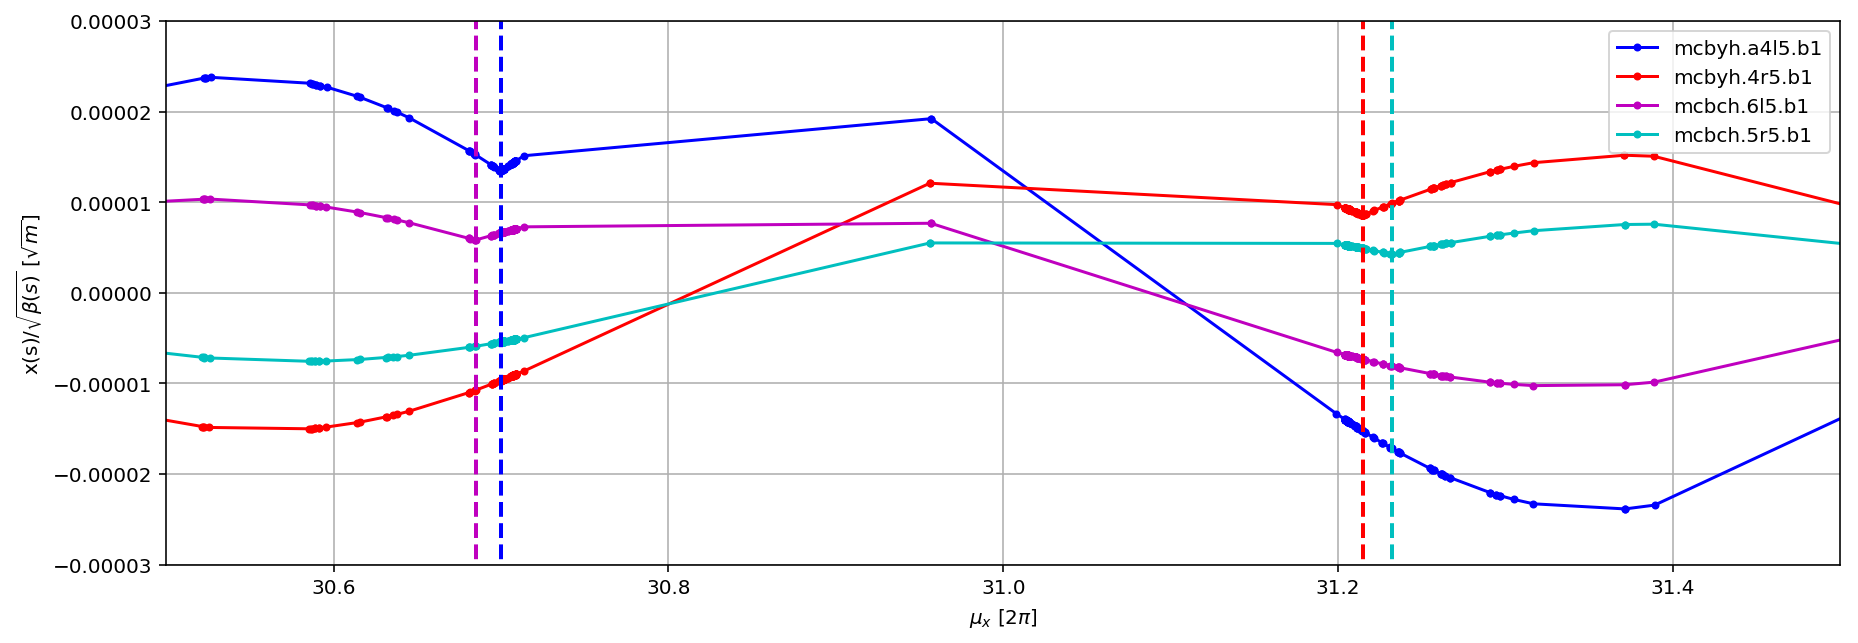

In [25]:
aux=madx.table.twiss.dframe()
myFig.gca().set_xlim(30.5, 31.5)
#fig.gca().set_xlim(aux[(aux['name']).str.contains('s.ds.l5.b2:1')].mux.values[0],aux[(aux['name']).str.contains('e.ds.r5.b2:1')].mux.values[0])
display(myFig)

(-0.002, 0.002)

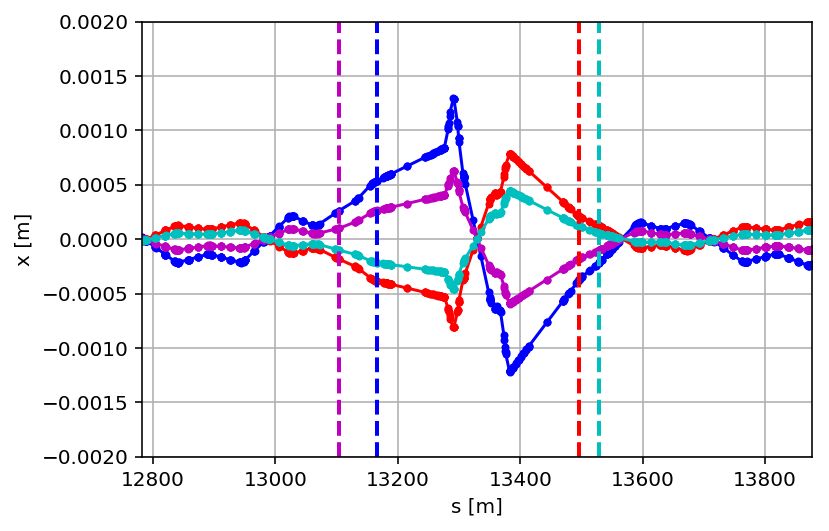

In [26]:
aux=madx.table.twiss.dframe()
colorList=['b','r','m','c']
for i,j in zip(range(6,10), range(5)):
    plt.plot(DFList[i].s.values,(DFList[i].x.values),'.-',color=colorList[j])
plt.xlim(aux[(aux['name']).str.contains('s.ds.l5.b1:1')].s.values[0],aux[(aux['name']).str.contains('e.ds.r5.b1:1')].s.values[0])
plt.grid()
for i,j in zip(['mcbyh.a4l5.b1','mcbyh.4r5.b1','mcbch.6l5.b1','mcbch.5r5.b1'],range(4)):
    aux=myTwissB1[(myTwissB1['name'].str.contains(i))]
    plt.plot(aux['s'].values[0]*np.array([1,1,]),[-.002, +0.002],'--', color=colorList[j], lw=2)
plt.xlabel('s [m]')
plt.ylabel('x [m]');
plt.ylim(-.002, +0.002)

In [27]:
# orbit response matrix
arrayList=[]
for i in range(10):
    aux=DFList[i]
    values=(aux[((aux['name']).str.contains('ip5:1')) | ((aux['name']).str.contains('e.ds.r5.b1:1')) ] )[['x','px']].values
    values=values.flatten()
    arrayList.append(values)
myMatrix=np.vstack(arrayList).transpose()
print(myMatrix[:,6:10])
mySolution=np.linalg.inv(myMatrix[:,6:10])@np.array([[0],[150e-6],[0],[0]])
mySolution

[[ 1.05157421e-05  6.63065177e-06  4.20228803e-06  3.01633400e-06]
 [-2.60575592e-05  1.67443215e-05 -1.26642470e-05  9.49510946e-06]
 [-2.33653737e-04  1.55720224e-04 -9.48497324e-05  8.11153974e-05]
 [ 4.37931300e-06 -2.77580999e-06  1.87957096e-06 -1.36555018e-06]]


array([[ 21.43905807],
       [-29.75539019],
       [-50.03343345],
       [ 60.3729309 ]])

(-0.034, 0.034)

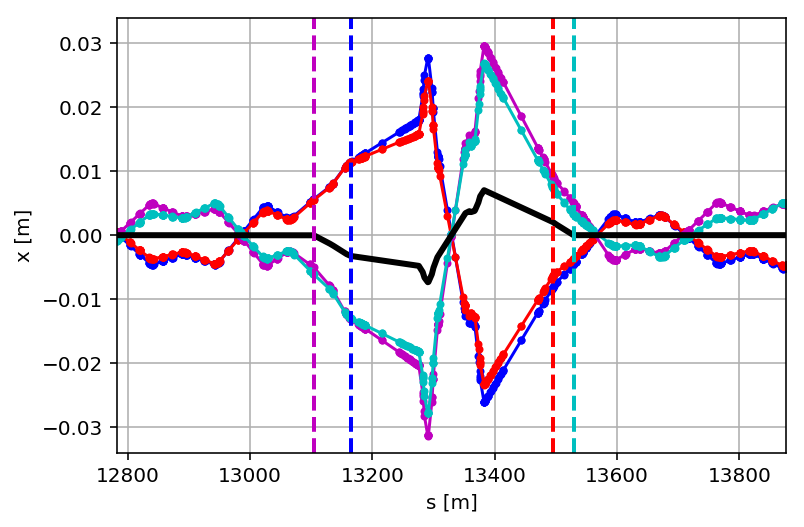

In [28]:
aux=madx.table.twiss.dframe()
colorList=['b','r','m','c']
for i,j in zip(range(6,10),range(4)):
    plt.plot(DFList[i].s.values,(DFList[i].x.values)*mySolution[j],'.-', color=colorList[j])

plt.plot(DFList[6].s.values,DFList[6].x.values*mySolution[0]\
         +DFList[7].x.values*mySolution[1]\
         +DFList[8].x.values*mySolution[2]\
         +DFList[9].x.values*mySolution[3], 'k-', lw=3)
plt.xlim(aux[(aux['name']).str.contains('s.ds.l5.b1:1')].s.values[0],aux[(aux['name']).str.contains('e.ds.r5.b1:1')].s.values[0])
plt.grid()

for i,j in zip(['mcbyh.a4l5.b1','mcbyh.4r5.b1','mcbch.6l5.b1','mcbch.5r5.b1'],range(4)):
    aux=myTwissB1[(myTwissB1['name'].str.contains(i))]
    plt.plot(aux['s'].values[0]*np.array([1,1,]),[-.034, +0.034],'--', color=colorList[j], lw=2)
plt.xlabel('s [m]')
plt.ylabel('x [m]');
plt.ylim(-.034, +0.034)

In [29]:
# dispersion response matrix
arrayList=[]
for i in range(10):
    aux=DFList[i]
    values=(aux[((aux['name']).str.contains('ip5:1')) | ((aux['name']).str.contains('e.ds.r5.b1:1')) ] )[['dx','dpx']].values
    values_ref=(DFList[10][((DFList[10]['name']).str.contains('ip5:1')) | ((DFList[10]['name']).str.contains('e.ds.r5.b1:1')) ] )[['dx','dpx']].values
    values=values-values_ref
    values=values.flatten()
    arrayList.append(values)
myMatrixDispersive=np.vstack(arrayList).transpose()
print(myMatrixDispersive[:,6:10])

[[ 3.72195739e-04 -4.06729894e-05  3.13534581e-04  6.91641507e-05]
 [ 8.09564136e-04 -5.36626117e-04  1.70457534e-05 -2.87560060e-05]
 [-4.27300297e-02  2.38111780e-02 -2.37965023e-02  1.22041681e-02]
 [ 5.33847398e-04 -2.93856950e-04  3.18012517e-04 -1.62574019e-04]]


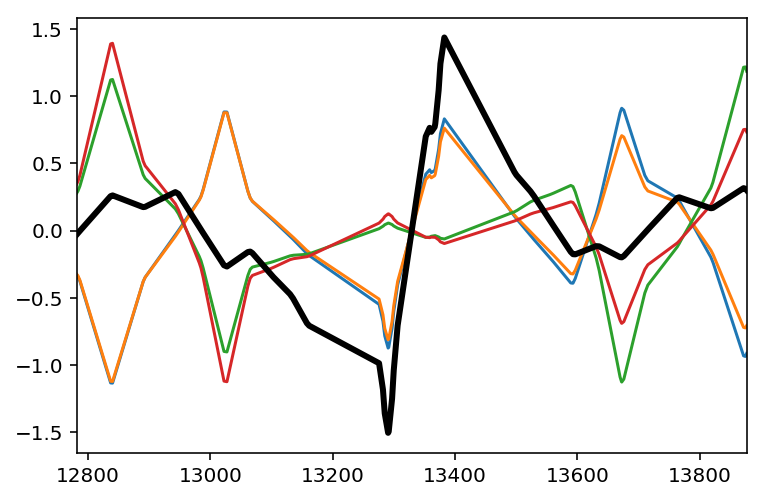

In [38]:
plt.plot(DFList[6]['s'],(DFList[6]['dx']-DFList[10]['dx'])*mySolution[0])
plt.plot(DFList[6]['s'],(DFList[7]['dx']-DFList[10]['dx'])*mySolution[1])
plt.plot(DFList[6]['s'],(DFList[8]['dx']-DFList[10]['dx'])*mySolution[2])
plt.plot(DFList[6]['s'],(DFList[9]['dx']-DFList[10]['dx'])*mySolution[3])
plt.xlim(aux[(aux['name']).str.contains('s.ds.l5.b1:1')].s.values[0],aux[(aux['name']).str.contains('e.ds.r5.b1:1')].s.values[0])
plt.plot(DFList[6]['s'],(DFList[6]['dx']-DFList[10]['dx'])*mySolution[0]+\
         (DFList[7]['dx']-DFList[10]['dx'])*mySolution[1]+\
         (DFList[8]['dx']-DFList[10]['dx'])*mySolution[2]+\
         (DFList[9]['dx']-DFList[10]['dx'])*mySolution[3],'k',lw=3)

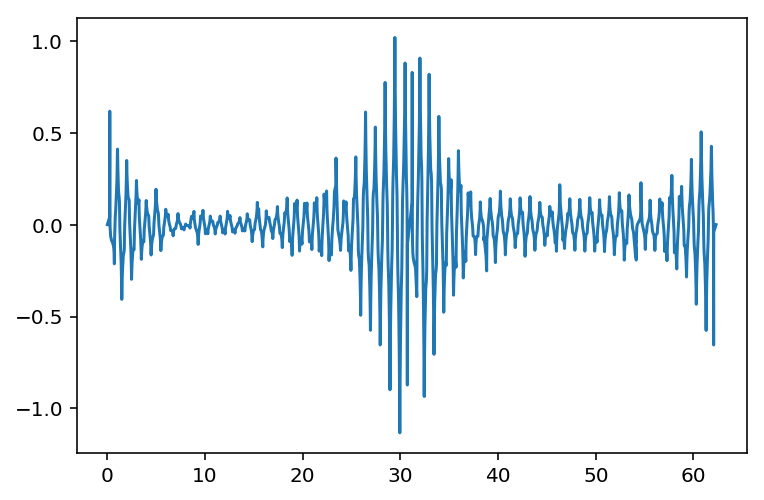

In [39]:
plt.plot(DFList[6]['mux'],(DFList[6]['dx']-DFList[10]['dx'])*mySolution[0])
